<img src="Images/IMG-Wine-Alcohol_Banner.png" alt="Title Banner" style="display: block; margin-left: auto; margin-right: auto; width: 100%">

---
Die Klasse von Wein finden Sie im Notebook _"Klassifikation von Wein"_ heraus. Aber manchmal sind andere Eigenschaften des Weins von Interessse, die sich nicht in eine finite Anzahl von Klassen einteilen lassen. In diesem Notebook befassen wir uns daher mit der Vorhersage des Alkoholgehalts von Wein mittels Regressionsanalyse.


<img src="Images/IMG-sklearn-logo.png" alt="Title Banner" style="float:right; display: block; margin-left: auto; margin-right: auto; width: 30%">

Dazu werden wir einige Regressionsmodelle und weitere Funktionen aus dem Python-Paket [```scikit-learn```](https://scikit-learn.org/stable/user_guide.html) (kurz: ```sklearn```) verwenden. ```Sklearn``` ist ein äußerst mächtiges Framework, das viele Methoden des Maschinenlernens mit einheitlichen Schnittstellen zur Verfügung stellt, so dass Sie schnell und einfach verschiedene Modelle ausprobieren können. Im Laufe dieses Notebooks werden Sie einige der Funktionenen und Objekte zur Regression kennenlernen. In dem Notebook _"Klassifikation von Wein"_ werden Sie ebenfalls mit ```sklearn``` arbeiten, allerdings mit dem Fokus auf die Methoden und Objekte zur Lösung von Klassifikationsproblemen.

Grundsätzlich gilt für beide Notebooks, dass Sie immer auch in der Dokumentation und dem User's Guide von ```sklearn``` sich weitere Informationen zu den verwendeten Objekten holen sollten, um ein tieferes Verständnis für die Zusammenhänge zu erwerben.


## Inhalt
<table style="width:256; border: 1px solid black; display: inline-block">
  <tr>
    <td  style="text-align:right" width=64px><img src="Images/IMG-csv-in.png" style="float:left"></td>
      <td style="text-align:left" width=128px>
          <a style="color:black; font-size:14px; font-weight:bold; text-decoration:none" href='#import_data'>Daten importieren</a>
      </td>
  </tr>
  <tr>
    <td style="text-align:right"><img src="Images/IMG-magnifying-glass.png" style="float:left"></td>
    <td style="text-align:left" width=128px><a style="color:black; font-size:14px; font-weight:bold; text-decoration:none" href='#analyze_data'>Daten analysieren</a>
      </td>
  </tr>
    <tr>
    <td style="text-align:right"><img src="Images/IMG-broom.png" style="float:left"></td>
    <td style="text-align:left" width=128px><a style="color:black; font-size:14px; font-weight:bold; text-decoration:none" href='#clean_data'>Daten säubern</a>
        </td>
    </tr>
    <tr>
    <td style="text-align:right"><img src="Images/IMG-gears.png" style="float:left"></td>
    <td style="text-align:left" width=128px><a style="color:black; font-size:14px; font-weight:bold; text-decoration:none" href='#build_model'>Modellauswahl</a>
        </td>
        <tr>
    <td style="text-align:right"><img src="Images/IMG-new-file-out.png" style="float:left"></td>
    <td style="text-align:left" width=128px><a style="color:black; font-size:14px; font-weight:bold; text-decoration:none" href='#save_model'>Modell speichern</a>
        </td>
  </tr>
</table>

**Hinweis:** In diesem Notebook sind einige Stellen enthalten, an denen Zufallszahlen zum Einsatz kommen (z.B. die Einteilung in Trainings- und Testset). Dadurch kann es passieren, dass manche Ergebnisse für Sie nicht exakt reproduzierbar sind und das relative Ranking der verschiedenen Regressionsmodelle oder die optimalen Werte mancher Hyperparameter bei Ihnen etwas anders aussehen. Das ändert allerdings nichts an der generellen Vorgehensweise oder den Programmiermustern. 

---


<a id='import_data'></a><div><img src="Images/IMG-csv-in.png" style="float:left"> <h2 style="position: relative; top: 6px; left:5px">1. Daten importieren</h2>
<p style="position: relative; top: 10px">
Die Daten der Weine wurden im Rahmen einer <a href='#data_source'>wissenschaftlichen Studie erhoben</a> und die genaue Bedeutung der einzelnen Merkmale können Sie in dem entsprechenden Paper nachlesen. Die gelisteten Merkmale sind:


<table style="width:256; border: 1px solid black; display: inline-block">
    <tr>
        <td style="text-align:left"><p style="color:black; font-size:14px; font-weight:bold">Fixed acidity</p>
        </td>
        <td style="text-align:left"><p style="color:black; font-size:14px"><a href="https://www.wein.de/de/glossar/nichtfluechtige-saeure/">Nichtflüchtige Säure</a></p>
        </td>
    </tr>
    <tr>
        <td style="text-align:left"><p style="color:black; font-size:14px; font-weight:bold">Volatile acidity:</p>
        </td>
        <td style="text-align:left"><p style="color:black; font-size:14px"><a href="https://www.wein.de/de/glossar/fluechtige-saeure/">Flüchtige Säure</a></p>
        </td>
    </tr>
    <tr>
        <td style="text-align:left"><p style="color:black; font-size:14px; font-weight:bold">Citric acid:</p>
        </td>
        <td style="text-align:left"><p style="color:black; font-size:14px"><a href="https://www.wein.de/de/glossar/zitronensaeure/">Zitronensäure</a></p>
        </td>
    </tr>
    <tr>
        <td style="text-align:left"><p style="color:black; font-size:14px; font-weight:bold">Residual sugar:</p>
        </td>
        <td style="text-align:left"><p style="color:black; font-size:14px"><a href="https://www.wein.de/de/glossar/restzucker-oder-restsuesse/">Restzucker</a></p>
        </td>
    </tr>
    <tr>
        <td style="text-align:left"><p style="color:black; font-size:14px; font-weight:bold">Chlorides:</p>
        </td>
        <td style="text-align:left"><p style="color:black; font-size:14px">Chloride</p>
        </td>
    </tr>
    <tr>
        <td style="text-align:left"><p style="color:black; font-size:14px; font-weight:bold">Free sulfur dioxide:</p>
        </td>
        <td style="text-align:left"><p style="color:black; font-size:14px"><a href="https://www.wein.de/de/glossar/schwefeln/">Freies Schwefeldioxid</a></p>
        </td>
    </tr>
    <tr>
        <td style="text-align:left"><p style="color:black; font-size:14px; font-weight:bold">Total sulfur dioxide:</p>
        </td>
        <td style="text-align:left"><p style="color:black; font-size:14px"><a href="https://www.wein.de/de/glossar/schwefeln/">Schwefeldioxid gesamt</a></p>
        </td>
    </tr>
    <tr>
        <td style="text-align:left"><p style="color:black; font-size:14px; font-weight:bold">Density:</p>
        </td>
        <td style="text-align:left"><p style="color:black; font-size:14px">Dichte</p>
        </td>
    </tr>
        <tr>
        <td style="text-align:left"><p style="color:black; font-size:14px; font-weight:bold">pH:</p>
        </td>
        <td style="text-align:left"><p style="color:black; font-size:14px"><a href="https://www.wein.de/de/glossar/ph-wert/">pH-Wert</a></p>
        </td>
    </tr>
        <tr>
        <td style="text-align:left"><p style="color:black; font-size:14px; font-weight:bold">Sulphates</p>
        </td>
        <td style="text-align:left"><p style="color:black; font-size:14px">Sulfate</p>
        </td>
    </tr>
        <tr>
        <td style="text-align:left"><p style="color:black; font-size:14px; font-weight:bold">Alcohol:</p>
        </td>
        <td style="text-align:left"><p style="color:black; font-size:14px">Der zu bestimmende Alkoholgehalt</p>
        </td>
    </tr>
        <tr>
        <td style="text-align:left"><p style="color:black; font-size:14px; font-weight:bold">Quality:</p>
        </td>
        <td style="text-align:left"><p style="color:black; font-size:14px">Subjektive Qualtitätsbewertung</p>
        </td>
    </tr>
    </table>   

<a id='data_source'></a><b>Quelle der Daten:</b> P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

</p>

Uns liegen zwei Datensätze zu, von denen einer nur Rotweine und der andere nur Weißweine enthält. Für dieses Notebook wollen wir mal annehmen, dass die Farbe des Weins keinen Einfluss auf das Ergebnis hat.

Die ersten Schritt sind daher der Import und die Verbindung der beiden Datensätze. Die Daten befinden sich in ```Data/winequality-red.csv``` und ```Data/winequality-white.csv```

In [1]:
import pandas as pd  # Siehe Preprocessing/Lego-Sets/Lego Sets Preprocessing.ipynb für eine Einführung in Pandas

# Datensätze importieren (pandas Funktion: pd.read_csv() Achtung: Trennzeichen ist hier das Semikolon ";"!)
df_red = pd.read_csv("Data/winequality-red.csv", sep = ';') 
df_white = pd.read_csv("Data/winequality-white.csv", sep = ';')

# Verbinden Sie die beiden Datensätze mit pd.concat()
df = pd.concat([df_red, df_white], axis = 0)
print(df)


      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  

<a id='analyze_data'></a><div><img src="Images/IMG-magnifying-glass.png" style="float:left"> <h2 style="position: relative; top: 6px; left:5px" >2. Daten analysieren</h2>
    
<p style="position: relative; top: 10px">
Als nächstes wollen wir uns die Daten mal näher ansehen. Benötigen wir eine Konvertierung von Merkmalen? Müssen Werte aufgefüllt werden?</p>


In [2]:
# Beginnen wir mit ein bisschen deskriptiver Statistik (pandas-Funktion describe()):
# df.dtypes
# df.isna().any()
df.count()
print("----------mean value of the wine----------\n" , df.mean())
print("----------Standardabweichungen---------\n", df.std())

----------mean value of the wine----------
 fixed acidity             7.215307
volatile acidity          0.339666
citric acid               0.318633
residual sugar            5.443235
chlorides                 0.056034
free sulfur dioxide      30.525319
total sulfur dioxide    115.744574
density                   0.994697
pH                        3.218501
sulphates                 0.531268
alcohol                  10.491801
quality                   5.818378
dtype: float64
----------Standardabweichungen---------
 fixed acidity            1.296434
volatile acidity         0.164636
citric acid              0.145318
residual sugar           4.757804
chlorides                0.035034
free sulfur dioxide     17.749400
total sulfur dioxide    56.521855
density                  0.002999
pH                       0.160787
sulphates                0.148806
alcohol                  1.192712
quality                  0.873255
dtype: float64


Wir stellen drei wichtige Tatsachen fest:

1. Es gibt insgesamt 6497 Weine, für die uns Daten vorliegen (__```count```__), zumindest gibt es so viele Einträge in jeder Spalte. Wir müssen also erfreulicherweise keine Daten auffüllen! 
2. Alle Merkmale sind rein numerisch. Wir müssen also auch keine Daten konvertieren!
3. Die Daten sind sehr unterschiedlich skaliert, da die Mittelwerte (__```mean```__) und Standardabweichungen (__```std```__) über mehrere Größenordnungen hinweg streuen.

Daher bietet es sich an, die Spalten zunächst einzeln zu standardisieren, so dass sie jeweils einen Mittelwert von 0 und eine Standardabweichung von 1 haben (auch $z$-Score Normalisierung genannt). Dadurch werden also alle Merkmale in die gleiche Größenordnung gebracht, ohne die relative Verteilung zu vereinfachen.

Unser Fahrplan für die Säuberung der Daten ist also klar:
- Kein Konvertieren oder Auffüllen nötig
- Standardisierung der Daten empfehlenswert
---

<a id='clean_data'></a><div><img src="Images/IMG-broom.png" style="float:left"> <h2 style="position: relative; top: 6px; left:5px">3. Daten säubern</h2>
<p style="position: relative; top: 10px">
Wie bereits oben festgestellt, müssen wir keine Konvertierungen oder Ersetzungen machen, sondern nur die Standardisierung vornehmen. </p>

Bevor wir allerdings die Standardisierung vornehmen, sollten wir zunächst die Daten in Trainings- und Testset aufteilen, damit wir nicht schon bei der Standardisierung Daten verwenden, die eigentlich vom Modell "ungesehene" Testdaten sein sollen. Dazu teilen wir den Datensatz zunächst in die Merkmalvektorfolge $X$ und Klassenlabel $y$.

In [4]:
## Zunächst trennen wir den gesamten Datensatz in die Merkmale und die vorherzusagende Größe
# X = df.drop(columns=['alcohol']) # Alle Spalten von df außer 'alcohol'
X = df.drop(columns = ['alcohol']) # Alle Spalten von df außer 'alcohol'

y = df['alcohol'] # Nur die Spalte 'alcohol'


Nun kommt der eigentliche Split in Train- und Testset, den wir mit Hilfe der Funktion [```traint_test_split()```](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) aus ```scikit-learn``` vornehmen wollen.

In [5]:
# Importieren Sie aus dem sklearn-Modul model_selection die Funktion train_test_split
from sklearn.model_selection import train_test_split
# Verwenden Sie nun die Funktion train_test_split(), um ein zurückgehaltenes (Holdout) Test-Set von 20% der gesamten Daten zu erhalten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print("----------X_train----------\n", X_train)
print("----------X_test----------\n", X_test)
print("----------y_train----------\n", y_train)
print("----------y_test----------\n", y_test)

----------X_train----------
       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
398             5.9              0.26         0.27            18.2      0.048   
1772            7.8              0.40         0.26             9.5      0.059   
764             9.1              0.68         0.11             2.8      0.093   
1476            9.9              0.50         0.50            13.8      0.205   
3007            5.0              0.27         0.32             4.5      0.032   
...             ...               ...          ...             ...        ...   
3275            6.5              0.48         0.02             0.9      0.043   
1355            6.1              0.32         0.25             1.8      0.086   
1397            7.3              0.25         0.36            13.1      0.050   
1495            7.0              0.43         0.02             1.9      0.080   
133             6.6              0.50         0.01             1.5      0.060   

Jetzt können wir auf dem Trainingsset die Parameter für die Standardisierung bestimmen und diese auf Trainings- und Testdaten ausführen. Wir könnten dazu natürlich von Hand in jeder Spalte den Mittelwert subtrahieren und sie durch ihre Standardabweichung teilen. Eleganter geht es jedoch mit Hilfe des Objekts [```StandardScaler```](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html):

In [6]:
# Importieren Sie aus dem sklearn-Modul preprocessing das Objekt StandardScaler
from sklearn.preprocessing import StandardScaler
# Instanziieren Sie ein Objekt StandardScaler()
stdScaler = StandardScaler()
# Berechnen Sie die Standardisierungsparametr auf dem Trainingsset (!) X_train mit Hilfe der Funktion "fit()"
print(stdScaler.fit(X_train))
# Wenden Sie die **selbe** Standardisierung mit Hilfe der Methode transform() auf die Trainings- und Testdaten an
X_train = stdScaler.transform(X_train)
X_test = stdScaler.transform(X_test)

StandardScaler()


---
<a id='build_model'></a><div><img src="Images/IMG-gears.png" style="float:left"> <h2 style="position: relative; top: 6px; left:5px">4. Modellauswahl</h2>
<p style="position: relative; top: 10px">
Nun können wir die aus der Vorlesung bekannten Regressionsansätze der Reihe nach ausprobieren, um das optimale Modell zu finden.</p> 
    
Der einfachste aus der Vorlesung bekannte Ansatz zur Regression des Alkoholgehalts ist die lineare Regression. Dazu existiert in ```sklearn``` das Objekt [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html), das eine sehr einfache Implementierung erlaubt:

In [7]:
# Importieren Sie das Objekt LinearRegression aus dem Modul linear_model im Paket sklearn
from sklearn.linear_model import LinearRegression

# Instanziieren Sie ein Modell mit den Standardparametern
lr1_model = LinearRegression()
# Trainieren ("Fitten") Sie das Modell auf den Trainingsdaten X_train mit Hilfe der Methode fit()
lr1_model.fit(X_train, y_train)

LinearRegression()

Die Güte dieses Regressionsmodells (und auch jedes anderen Modells in ```sklearn```) auf einem beliebigen Datensatz können Sie mit der Methode [```score()```](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.score) bestimmen. Bei Regressionsmodellen ist die standardmäßig verwendete Metrik hier das Bestimmtheitsmaß $R^2$ (siehe Vorlesung).

In [8]:
# R^2 im Training
train_score_lr1 = lr1_model.score(X_train, y_train)
# R^2 im Test
test_score_lr1 = lr1_model.score(X_test, y_test)
# Ausgabe der Performancemaße
print("Lineare Regression 1. Ordnung - Training: R² = {:.2f} Test: R² = {:.2f}".format(train_score_lr1, test_score_lr1))

Lineare Regression 1. Ordnung - Training: R² = 0.82 Test: R² = 0.70


In der Vorlesung haben Sie gelernt, dass man verschiedene Basisfunktionen $\varphi(x)$ bei der linearen Regression annehmen kann. Auch das Objekt ```LinearRegression``` können Sie mit beliebigen Funktionen $\varphi(x)$ verwenden. Dabei müssen Sie die durch $\varphi(x)$ vermittelte Transformation der Merkmale selbst vornehmen und dann die neuen, transformierten Merkmale (also die Matrix $\Phi$ in der Vorlesung) an die Fit-Methode von ```LinearRegression``` übergeben.

Wir probieren das hier mal am Beispiel von einer polynomialen Basisfunktion zweiten Grades aus:

\begin{align}
\varphi_1(x) &= x^1 \\
\varphi_2(x) &= x^2
\end{align}

Die Merkmale liegen in erster Ordnung ($x^1$) ja schon in den Trainingsdaten vor. Die Merkmale zweiter Ordnung ($x^2$) müssen wir nun durch spaltenweise Quadrierung der Merkmalmatrix manuell hinzufügen:

In [9]:
import numpy as np # Für die Matrixoperationen

# Die Merkmalmatrix 1. Ordnung muss um die Merkmale 2. Ordnung ergänzt werden
X_2_train = np.concatenate([X_train, X_train ** 2], axis=1)
print("----------X_2_train----------\n", X_2_train)
# Verfahren Sie analog für die Testdaten
X_2_test = np.concatenate([X_test, X_test ** 2], axis=1)
print("----------X_2_test----------\n", X_2_test)

----------X_2_train----------
 [[-1.01496882 -0.4937205  -0.32691466 ...  0.65802062  0.39252739
   0.8730705 ]
 [ 0.4414152   0.36504393 -0.39510553 ...  1.23696637  0.48362784
   0.04919728]
 [ 1.43788848  2.08257281 -1.41796857 ...  0.31697726  0.01729971
   0.04919728]
 ...
 [ 0.05815625 -0.55506082  0.28680316 ...  1.23696637  0.23882092
   1.89886082]
 [-0.17179913  0.54906489 -2.03168639 ...  0.65802062  3.69900299
   0.04919728]
 [-0.47840629  0.9784471  -2.09987726 ...  1.25755234  0.11442582
   0.04919728]]
----------X_2_test----------
 [[ 5.81562459e-02 -2.99796816e-03 -1.22342056e-01 ...  6.39005726e-02
   2.07721901e-02  4.91972750e-02]
 [-1.84955446e-02  1.65319059e+00 -1.62254118e+00 ...  3.63822373e-02
   2.07721901e-02  8.73070497e-01]
 [-4.78406288e-01 -1.87018919e-01  3.54994028e-01 ...  1.65629028e-02
   9.43011007e-01  4.37048049e+00]
 ...
 [ 1.34808037e-01 -6.77741456e-01  4.23184897e-01 ...  9.76344009e-01
   2.38820924e-01  8.73070497e-01]
 [ 2.88111618e-01  2.4

Die Merkmale 2. Ordnung sind nicht zwangsläufig mittelwertfrei und haben eine von 1 verschiedenen Varianz. Wir müssen sie also noch standardisieren:

In [10]:
# Instanziieren Sie einen neuen StandardScaler und "fitten" Sie es in die Trainingsdaten inklusive 2. Ordnung
stdScaler_2 = StandardScaler().fit(X_2_train)
# Standardisieren Sie die Trainings- und Testdaten zweiter Ordnung
X_2_train = stdScaler_2.transform(X_2_train)
X_2_test = stdScaler_2.transform(X_2_test)


Nun können wir also ein Regressionsmodell für die Merkmale bis zur Ordnung 2 trainieren:

In [11]:
# Instanziieren Sie ein Modell mit den Standardparametern
lr2_model =  LinearRegression()
# Trainieren ("Fitten") Sie das Modell auf den Trainingsdaten X_2_train mit Hilfe der Methode fit()
lr2_model.fit(X_2_train, y_train)

LinearRegression()

In [12]:
# R^2 im Training
train_score_lr2 = lr2_model.score(X_2_train, y_train)
# R^2 im Test
test_score_lr2 = lr2_model.score(X_2_test, y_test)
# Ausgabe der Performancemaße
print("Lineare Regression 2. Ordnung - Training: R² = {:.2f} Test: R² = {:.2f}".format( train_score_lr2, test_score_lr2 ))

Lineare Regression 2. Ordnung - Training: R² = 0.84 Test: R² = 0.83


Aha, die Vorhersage hat sich deutlich verbessert! Allerdings haben wir nun natürlich auch mehr Prädiktoren verwendet, was grundsätzlich die Gefahr von Überanpassung ("Overfitting") erhöht. Wir berechnen also zur Kontrolle das korrigierte Bestimmtheitsmaß $R^2_\mathrm{korr} = 1 - (1 - R^2)\frac{N-1}{N-M-1}$ (siehe Vorlesung):


In [13]:
# Anzahl der Stichprobenelemente
N = X_2_train.shape[0]
# Anzahl der Prädiktoren
M = X_2_train.shape[1]
# Korrgiertes R^2 berechnen
R2_korr = 1 - (1-train_score_lr2) * (N-1) / (N-M-1)
print("Das korrigerte R² für die Trainingsdaten beträgt {:.2f}.".format(R2_korr))

Das korrigerte R² für die Trainingsdaten beträgt 0.84.


Da $R^2 = R^2_\mathrm{korr}$, ist die Erhöhung der Anzahl der Prädiktoren aufgrund der großen Zahl von Beobachtungen also offenbar noch gerechtfertigt.

Würde die Hinzunahme von Merkmalen in der dritten Potenz vielleicht eine noch weitere Verbesserung liefern? Probieren Sie es aus!

In [14]:
# Die Merkmalmatrizen 2. Ordnung müssen um die Merkmale 3. Ordnung ergänzt werden
X_3_train = np.concatenate([X_train, X_train ** 2, X_train ** 3], axis=1)
X_3_test = np.concatenate([X_test, X_test ** 2, X_test ** 3], axis=1)

# Instanziieren Sie einen neuen StandardScaler und "fitten" Sie es in die Trainingsdaten inklusive 3. Ordnung
stdScaler_3 = StandardScaler().fit(X_3_train)

# Standardisieren Sie die Trainings- und Testdaten dritter Ordnung
X_3_train = stdScaler_3.transform(X_3_train)
X_3_test = stdScaler_3.transform(X_3_test)

# Instanziieren Sie ein Modell mit den Standardparametern
lr3_model =  LinearRegression()
# Trainieren ("Fitten") Sie das Modell auf den Trainingsdaten X_3_train mit Hilfe der Methode fit()
lr3_model.fit(X_3_train, y_train)

# R^2 im Training
train_score_lr3 = lr3_model.score(X_3_train, y_train)
# R^2 im Test
test_score_lr3 = lr3_model.score(X_3_test, y_test)
# Ausgabe der Performancemaße
print("Lineare Regression 3. Ordnung - Training: R² = {:.2f} Test: R² = {:.2f}".format( train_score_lr3, test_score_lr3 ))

Lineare Regression 3. Ordnung - Training: R² = 0.85 Test: R² = 0.42


**Hinweis:** Bei Regressionsmodellen höherer Ordnung verwendet man häufig nicht nur die Merkmale in der jeweiligen Potenz, sonder auch die sogenannten "Interaktionsterme", also die paarweisen Multiplikationen der Merkmale. Für nur zwei Merkmale $(x_1, x_2)$ würde das also das folgende Modell ergeben:

$$\hat{y} = w_0 + w_1 \cdot x_1 + w_2 \cdot x_1 \cdot x_2 + w_3 \cdot x_1^2 + w_4\cdot x_2 + w_5\cdot x_2^2$$

Bei einer größeren Anzahl Merkmale wird die Merkmaltransformation hierzu sehr aufwändig. Darum bietet ```sklearn``` das Objekt [```PolynomialFeatures```](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) an, mit dem diese Transformation erheblich einfacher implementiert werden kann. Schauen Sie sich doch die verlinkte Dokumentation mal an und versuchen Sie die Transformation für zweite und dritte Ordnung doch mal damit zu machen!

Wir fahren aber zunächst fort mit der $L^2$-regularisierten Regression, auch Ridge Regression genannt. Auch hier bietet ```sklearn``` ein Objekt [```Ridge```](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html). Allerdings müssen Sie diesem Objekt den Wert für ```alpha``` (in der Vorlesung $\lambda$) explizit übergeben. Dieser Wert muss aber üblicherweise durch Kreuzvalidierung erst gefunden werden. Aus diesem Grund existiert zusätzlich das Objekt [```RidgeCV```](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html), mit dem Sie die Kreuzvalidierung (engl. crossvalidation, CV) zur Bestimmung von ```alpha``` direkt ausführen können:

In [15]:
# Importieren Sie aus dem Modul linear_model im Paket sklearn das Objekt RidgeCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import RidgeCV
# Wählen Sie die Werte für den Regularisierungsparameter alpha (in Vorlesung lambda genannt), die Sie ausprobieren möchten
alpha_candidates = np.logspace(-6, 10, 17) # üblicherweise verwendet man hier als Kandidaten eine logarithmische Spanne von Werten

# Instanziieren Sie ein RidgeCV-Objekt und übergeben Sie dabei die Kandidaten für alpha
ridge1_model = RidgeCV(alphas=alpha_candidates)

# Trainieren ("Fitten") Sie das Modell auf den Trainingsdaten
ridge1_model.fit(X_train, y_train)

RidgeCV(alphas=array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07, 1.e+08, 1.e+09,
       1.e+10]))

Wie Sie sehen, wiederholt sich das Programmiermuster im Vergleich zu ```LinearRegression``` stark, obwohl Sie ein anderes Modell verwenden. Nach dem Training gibt Ihnen RidgeCV das optimal regularisierte Modell zurück. Der gefundene optimale Wert für ```alpha``` kann über den Parameter ```alpha_``` des Objekts ausgelesen werden:

In [16]:
# Optimales alpha
alpha_opt = ridge1_model.alpha_
# R^2 im Training
train_score_ridge1 = ridge1_model.score(X_train, y_train)
# R^2 im Test
test_score_ridge1 = ridge1_model.score(X_test, y_test)
# Ausgabe der Performancemaße
print("Ridge Regression 1. Ordnung (alpha={:.2f}): Training R^2 = {:.2f} Test R^2 = {:.2f}".format(alpha_opt, train_score_ridge1, test_score_ridge1))

Ridge Regression 1. Ordnung (alpha=1.00): Training R^2 = 0.82 Test R^2 = 0.70


Verfahren Sie analog für die Merkmale bis zur Ordnung 2 und 3:

In [17]:
# Instanziieren Sie ein RidgeCV-Objekt und übergeben Sie dabei die Kandidaten für alpha
ridge2_model = RidgeCV(alphas=alpha_candidates)

# Trainieren ("Fitten") Sie das Modell auf den Trainingsdaten
ridge2_model.fit(X_2_train, y_train)

# Optimales alpha
alpha_opt = ridge2_model.alpha_
# R^2 im Training
train_score_ridge2 = ridge2_model.score(X_2_train, y_train)
# R^2 im Test
test_score_ridge2 = ridge2_model.score(X_2_test, y_test)
# Ausgabe der Performancemaße
print("Ridge Regression 2. Ordnung (alpha={:.2f}): Training R^2 = {:.2f} Test R^2 = {:.2f}".format(alpha_opt, train_score_ridge2, test_score_ridge2))

# Instanziieren Sie ein RidgeCV-Objekt und übergeben Sie dabei die Kandidaten für alpha
ridge3_model = RidgeCV(alphas=alpha_candidates)

# Trainieren ("Fitten") Sie das Modell auf den Trainingsdaten
ridge3_model.fit(X_3_train, y_train)

# Optimales alpha
alpha_opt = ridge3_model.alpha_
# R^2 im Training
train_score_ridge3 = ridge3_model.score(X_3_train, y_train)
# R^2 im Test
test_score_ridge3 = ridge3_model.score(X_3_test, y_test)

# Ausgabe der Performancemaße
print("Ridge Regression 3. Ordnung (alpha={:.2f}): Training R^2 = {:.2f} Test R^2 = {:.2f}".format(alpha_opt, train_score_ridge3, test_score_ridge3))


Ridge Regression 2. Ordnung (alpha=1.00): Training R^2 = 0.84 Test R^2 = 0.83
Ridge Regression 3. Ordnung (alpha=10.00): Training R^2 = 0.85 Test R^2 = 0.58


Wir stellen fest, dass das optimale $\lambda$ für 1. und 2. Ordnung gleich 1 beträgt, was mathematisch identisch zur unregularisierten Regression ist (siehe Vorlesung). Für die 3. Ordnung wird eine sehr starke Regularisierung als optimal identifiziert. Allerdings ist die Performance auf dem Testset trotzdem noch schlechter, als bei 2. Ordnung. Offenbar kann mit dieser Menge von Beobachtungen eine Überanpassung auch mit $L2$-Regularisierung nicht vermieden werden.

In der Vorlesung wurde erwähnt, dass auch Support Vector Machines (SVM) für die Regression angewendet werden können. Auch wenn diese Methoden nicht Gegenstand der Vorlesung sind und ihr theoretischer Hintergrund an dieser Stelle den Rahmen sprengen würde, wollen wir sie doch ausprobieren, da sie ein sehr mächtiges Modell darstellen und durch ```sklearn```auch ohne tieferes Wissen implementierbar sind.

Die (sehr stark vereinfachte) Grundidee bei der Regression mit Support Vector Machines ist, dass sich ähnlich wie bei der Klassifikation die zu findende Funktion nicht auf alle Datenpunkte stützt, sondern nur auf einige wenige Supportvektoren, durch die dann die Regressionsfunktion gelegt wird. Ein Parameter $\epsilon$ steuert, wie viele Punkte noch berücksichtigt werden, wobei ein größeres $\epsilon$ eine geringere Empfindlichkeit auf Ausreißer bedeutet. Auch bei der Regression können Sie den Kernel-Trick (siehe Vorlesung) anwenden und durch den Parameter $C$ regularisieren.

Das Objekt zur Regression mit Support Vector Machines in ```sklearn``` heißt [```SVR```](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html?highlight=svr#sklearn.svm.SVR):

In [18]:
# Importieren Sie aus dem Modul svm im Paket sklearn das Objekt SVR
from sklearn.svm import SVR

# Instanziieren eines SVR-Objekts mit Standardeinstellungen
svr_model = SVR( C=1, epsilon=0.2)
# Trainieren Sie das Modell
svr_model.fit(X_train, y_train)

# # R^2 im Training
train_score_svr = svr_model.score(X_train, y_train)
# # R^2 im Test
test_score_svr = svr_model.score(X_test, y_test)

# # Ausgabe der Performance
print("Support Vector Regression: Training R^2 = {:.2f} Test R^2 = {:.2f}".format(train_score_svr, test_score_svr))

Support Vector Regression: Training R^2 = 0.91 Test R^2 = 0.88


Wie Sie sehen, erreicht die SVR "aus dem Stand" ein sehr gutes Testergebnis. Allerdings lohnt es sich meistens, die Hyperparameter $C$ und $\epsilon$ mit Hilfe von Kreuzvalidierung zu optimieren.

Zur Optimierung der Hyperparameter ("Tuning des Modells") basierend auf Kreuzvalidierung bietet uns ```sklearn``` im Modul ```model_selection```(neben einigen anderen Varianten) das Objekt [```GridSearchCV```](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) an. Dieses Objekt führt eine Gittersuche (engl. _grid search_) auf einem vorgebenen Parametergitter aus und überprüft an jedem Gitterknoten die Performance des so parametrisierten Modells mit Hilfe von Kreuzvalidierung (engl. _crossvalidation_, CV). Dazu benötigt es das zu tunende Regressionsmodell, das Parametergitter und weitere optionale Steuerparameter, wie die Anzahl der Folds in der Kreuzvalidierung.

Die Werte der Hyperparameter, die ausprobiert werden sollen, werden in Form einer Liste von [Dictionary](https://docs.python.org/3/tutorial/datastructures.html#dictionaries) übergeben. Jedes Dictionary enthält ein Gitter, das abgesucht wird. 

Am Ende wird das Modell mit dem als optimal identifizierten Hyperparametersatz auf allen Folds trainiert, so dass der Rückgabewert der Methode ```fit()``` ein auch im Sinne der Hyperparameter optimales Regressionsmodell darstellt.

**Es empfiehlt sich sehr, die Hyperparameteroptimierung auf einem parallen Rechner auszuführen!*** Da jede Hyperparameterkonfiguration und jede Kreuzvalidierung unabhängig voneinander berechnet werden können, ist hier ein nahezu perfekter paralleler [Speedup](https://de.wikipedia.org/wiki/Speedup) möglich. Ein einfaches Beispiel (gilt analog für Hyperparameter in der Regression):

Sie wollen prüfen, welche Zahl zwischen 1 und 10 die beste Zahl von Nachbarn in dem $k$ Nächste Nachbarn Klassifikator darstellt. Dazu müssen Sie also 10 Modelle mit 10 verschiedenen Werten für $k$ berechnen und diese miteinander vergleichen. Zum Vergleich wollen Sie jedes Modell mit 4 Folds validieren. Dazu müssen Sie also für jeden der 10 Werte von $k$ schon 4 Modell berechnen, also insgesamt 40 Trainingsvorgänge. Auf einem Single-CPU Rechner dauert dies dann zum Beispiel eine Minute. Da alle Berechnungen getrennt voneinander gemacht werden könne, kann das exakt gleiche Training auf einem Parallelrechner mit z.B. 20 CPUs in 1/20 der Zeit gerechnet werden, also in diesem Beispiel in nur 3 Sekunden. Wenn noch weitere Hyperparameter optimiert oder mehr Werte ausprobiert werden sollen, explodiert der Rechenaufwand entsprechend durch die kombinatorische Vielfalt des Gitters. Parallele Ausführung ist hier also enorm wichtig. ***Wir empfehlen daher nachdrücklich das Arbeiten auf dem HPC (siehe [Einführung ins Praktikum](https://bildungsportal.sachsen.de/opal/auth/RepositoryEntry/23165501449/CourseNode/101490883666782))!***

**Achtung:** Die Dauer des Trainings ist stark abhängig von der Größe des Parameters $C$. Für kleine Werte von $C$ kann das Training schon nach wenigen Sekunden abgeschlossen sein, während es bei großen Werten durchaus mehrere Minuten dauern kann. Wundern Sie sich also nicht, wenn die Kreuzvalidierung zwischendurch "eingefroren" erscheint.

In [18]:
# Importieren Sie das Objekt GridSearchCV aus dem Modul model_selection im Paket sklearn
from sklearn.model_selection import GridSearchCV
import numpy as np
# Auswahl der zu testenden Hyperparameter (alle nicht spezifizierten bleiben auf dem Standardwert)
param_grid = [
    {'C': np.logspace(-2, 2, 5),        # Parameter C nach Vorlesung
     'epsilon': np.logspace(-3, 3, 7),  # Parameter epsilon zur Steuerung 
     'kernel': ['linear', 'rbf']},      # Verwendeter Kernel
]

Falls Sie nicht auf dem HPC arbeiten und nicht so lange warten wollen, überspringen Sie die nächste Zelle und arbeiten Sie einfach mit den folgenden Werten für die Hyperparameter weiter:

$C = 10$, $\epsilon = 0.1$, Kernel: RBF


In [19]:
# Instanziieren des Objekts "GridSearchCV"
svr_model = GridSearchCV(SVR(),            # Regressionsmodell, das benutzt werden soll
                         param_grid,       # Auszuprobierenden Hyperparameterwerte
                         scoring='r2',     # Zu verwendende Metrik
                         cv=5,             # Anzahl der Folds für die Kreuvalidierung
                         verbose=10,       # Menge des Output während der Suche (größere Zahl -> mehr Info)
                         n_jobs=-1)        # Anzahl der parallel genutzen CPUs; -1: alle verfügbaren CPUs nutzen

# Trainieren Sie das Modell
svr_model.fit(X_train, y_train)

NameError: name 'GridSearchCV' is not defined

Beachten Sie in der ersten Zeile der Ausgabe der Fit-Funktion die große Anzahl von zu trainierenden Modellen ("Fits"), die sich aus den relativ wenigen Hyperparametern ergeben haben. 

Die beste gefundenen Hyperparameterkombination können Sie über die Eigenschaft ```best_params_``` der Instanz von ```GridSearchCV``` auslesen:

In [20]:
print(svr_model.best_params_)

AttributeError: 'SVR' object has no attribute 'best_params_'

Ob die Performance besser geworden ist, sehen wir an einem Vergleich des $R^2$ auf dem Testset:

In [21]:
svr_model = SVR(C=10, epsilon=0.1, kernel='rbf').fit(X_train, y_train) # Kommentieren Sie diese Zeile ein, wenn Sie die Kreuzvalidierung übersprungen haben

# R^2 im Training
train_score_svr =  svr_model.score(X_train, y_train)
# R^2 im Test
test_score_svr =  svr_model.score(X_test, y_test)

# Ausgabe der Performance
print("Tuned Support Vector Regression: Training R^2 = {:.2f} Test R^2 = {:.2f}".format(train_score_svr, test_score_svr))

Tuned Support Vector Regression: Training R^2 = 0.94 Test R^2 = 0.89


Durch das Hyperparametertuning hat sich die Performance also weiter verbessert! Damit ist die SVR das beste der betrachteten Modelle. Bevor wir es für die weitere Verwendung exportieren, lohnt sich noch ein kurzer Blick auf den sogenannten Target-Response-Plot. Dabei wird in einem Streudiagramm die Zielgröße (der tatsächliche Alkoholgehalt) als unabhängige Variable gegen die Response (der vorhergesagte Alkoholgehalt) aufgetragen. Eine perfekte Regression wäre in dieser Darstellung also eine Gerade mit der Steigung 1.

Zur grafischen Darstellung importieren wir zunächst ein Paket zur grafischen Darstellung von Daten. Es gibt eine Vielzahl von solchen Paketen in Python, aber wir werden hier [matplotlib](https://matplotlib.org/) verwenden.

Text(0, 0.5, 'Predicted Alcohol')

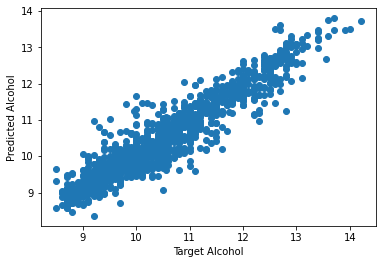

In [22]:
# Import des Moduls zum plotten aus Matplotlib
from matplotlib import pyplot as plt
# Dies ist ein sog. "Magic-Kommando", das die Darstellung der Plots direkt im Notebook ermöglicht. 
# Wenn Sie dieses vergessen, tauchen die Plots nicht auf!
%matplotlib inline

# Vorhersagen eines Modells können Sie mit der Methode predict() generieren
y_predicted = svr_model.predict(X_test)

# Im Streudiagramm (Scatter-Plot) ide Größen gegeneinander auftragen
plt.scatter(y_test, y_predicted)
plt.xlabel("Target Alcohol")
plt.ylabel("Predicted Alcohol")

Im Target-Response-Plot ist zwar keine perfekte Einheitsgerade zu sehen, aber die Punktwolke ist doch relativ gleichförmig verteilt und es sind keine starken Ausreißer zu sehen. Damit deckt sich der Eindruck mit dem Wert von $R^2$ im Test und es ist folglich ein gutes Ergebnis erzielt worden.

---
<a id='save_model'></a><div><img src="Images/IMG-new-file-out.png" style="float:left"> <h2 style="position: relative; top: 6px; left:5px">5. Modell speichern</h2>
<p style="position: relative; top: 10px">
Die optimal getunte Support Vector Regression ist also das beste untersuchte Modell. Wir möchten es daher abspeichern, damit für zukünftige Anwendungen nicht immer erst das Modell wieder neu trainiert werden muss.</p>

Hierzu importieren wir das Modul ```pickle```und schreiben das Modell und (ganz wichtig) auch das Objekt zur Standardisierung in eine Binärdatei. Wenn wir den Standardisierer nicht auch speicher würden, könnte eine Anwenderin oder ein Anwender unseres Modells neue Daten nicht standardisieren und so keine sinnvollen Vorhersagen machen!

In [23]:
# Importieren Sie das Modul pickle
import pickle

with open('wine_alcohol_model.pickle', 'wb') as model_file:
    # Schreiben Sie die beiden Objekte in die Datei
    pickle.dump([svr_model, stdScaler], model_file)

Wenn Sie das Modell an anderer Stelle wieder benutzen möchten, können Sie es direkt aus der Binärdatei laden:

In [24]:
with open('wine_alcohol_model.pickle', 'rb') as model_file:
    # Entpacken Sie die Objekte aus der Datei in zwei neue Variablen
    svr, scaler = pickle.load(model_file)

Das war's!

<img src="Images/IMG-xkcd-ballmer.png" alt="Title Banner" style="display: block; margin-left: auto; margin-right: auto; width: 100%; max-width:652px">
Source: <a href="https://xkcd.com/license.html">xkcd</a>

---
<div>Wine data from <a href="http://archive.ics.uci.edu/ml/datasets/Wine">UCI Machine Learning Repository</a></div>
<div>Icons made by <a href="https://www.flaticon.com/authors/swifticons" title="Swifticons">Swifticons</a> from <a href="https://www.flaticon.com/" title="Flaticon">www.flaticon.com</a></div>
<div>Notebook erstellt von Yifei Li und <a href="mailto:simon.stone@tu-dresden.de?Subject=Frage%20zu%20Jupyter%20Notebook%20Titanic" target="_top">Simon Stone</a></div>